<a href="https://colab.research.google.com/github/rakeshcoolkat/Image_recognition-Python/blob/master/Hand_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyunpack
!pip install patool
import os
from pyunpack import Archive

local_zip = '/content/Assignment.rar'
Archive('/content/Assignment.rar').extractall('/content/sample_data')


In [0]:
# Directory with our left_hand pictures
train_left_dir = os.path.join('/content/sample_data/Assignment/LeftH')

# Directory with our right hand pictures
train_right_dir = os.path.join('/content/sample_data/Assignment/rightH')

In [3]:
train_left_names = os.listdir(train_left_dir)
print(train_left_names[:10])

train_right_names = os.listdir(train_right_dir)
print(train_right_names[:10])

['82.jpg', '42.jpg', '165.jpg', '110.jpg', '57.jpg', '112.jpg', '86.jpg', '94.jpg', '175.jpg', 'prt1317.jpg']
['VID_20190425_000306 0920.jpg', 'VID_20190425_000306 0910.jpg', 'VID_20190425_000600 0090.jpg', 'VID_20190425_000306 0876.jpg', 'VID_20190425_000306 0011.jpg', 'VID_20190425_000306 0047.jpg', 'VID_20190425_000600 0092.jpg', 'VID_20190425_000306 0901.jpg', 'VID_20190425_000306 0878.jpg', 'VID_20190425_000306 0906.jpg']


In [4]:
print('total training left hand images:', len(os.listdir(train_left_dir)))
print('total training right hand images:', len(os.listdir(train_right_dir)))

total training left hand images: 201
total training right hand images: 201


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

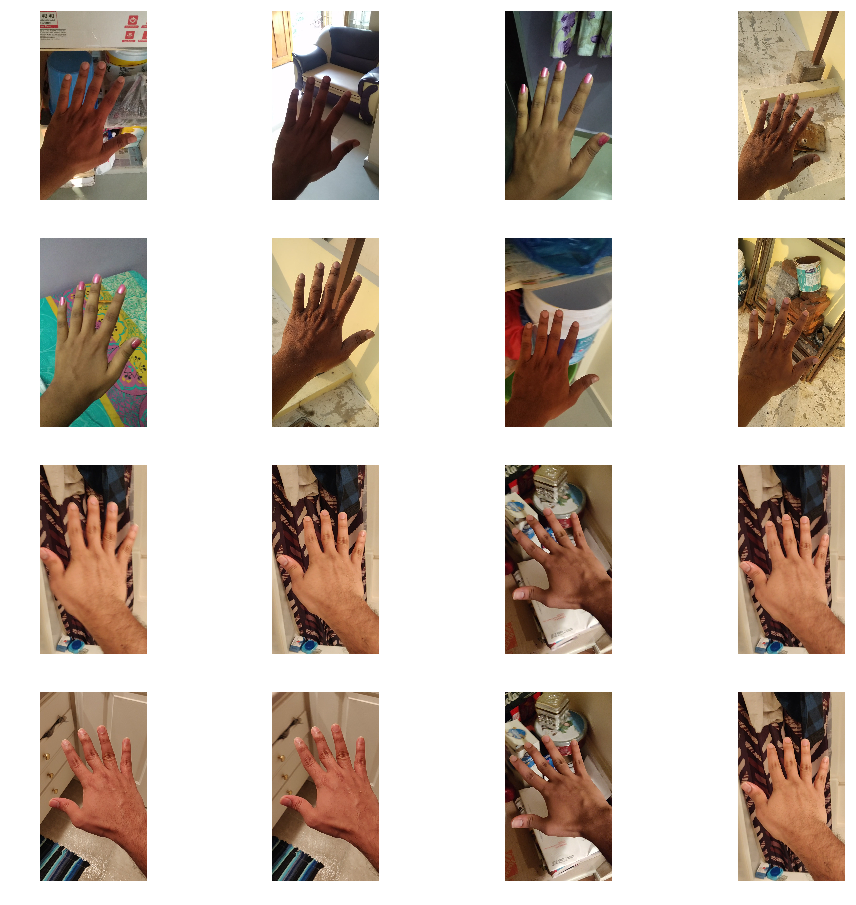

In [6]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_left_pix = [os.path.join(train_left_dir, fname) 
                for fname in train_left_names[pic_index-8:pic_index]]
next_right_pix = [os.path.join(train_right_dir, fname) 
                for fname in train_right_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_left_pix+next_right_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [8]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 1080*1920 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('left') and 1 for the other ('right')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

NameError: ignored

In [0]:
model.summary()

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/sample_data/Assignment/',  # This is the source directory for training images
        target_size=(300,300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

In [0]:
!pip install pillow

In [1]:
import tensorflow as tf
tf.__version__


'1.13.1'

In [0]:
#!pip install tensorflow-gpu==1.5.0

In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=2,  
      epochs=2,
      verbose=1)